# Titanic - Machine Learning from Disaster
* **Goal:** Classify if a passenger survived the sinking of the Titanic or not.
* **Metric** Our score is the percentage of passengers we correctly predict (Accuracy).

In [ ]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('train.csv') #891 rows × 12 columns
test_df = pd.read_csv('test.csv') # 418 rows × 11 columns

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# Feature Engineering

In [ ]:
# Add prefix columns for 'Cabin' and 'Ticket' to groups with the same starting prefix

# Cabin
train_df['CabinPrefix'] = train_df['Cabin'].str.extract(r'([A-Za-z]+)', expand=False).fillna('NaN')
train_df['CabinPrefix'].value_counts()

# Ticket
train_df['TicketPrefix'] = train_df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False).fillna('number')
train_df['TicketPrefix'].value_counts() # Check the unique ticket prefixes and their counts

# Cabin
test_df['CabinPrefix'] = test_df['Cabin'].str.extract(r'([A-Za-z]+)', expand=False).fillna('NaN')
test_df['CabinPrefix'].value_counts()

# Ticket
test_df['TicketPrefix'] = test_df['Ticket'].str.extract(r'([A-Za-z]+)', expand=False).fillna('number')
test_df['TicketPrefix'].value_counts() # Check the unique ticket prefixes and their counts

,count
TicketPrefix,
number,296
PC,32
C,22
SC,12
A,11
SOTON,10
CA,8
S,7
W,6


In [ ]:
# Check which columns contain Null values
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Remove columns that will not used for predictive model
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'CabinPrefix'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'CabinPrefix'], axis=1, inplace=True)

In [ ]:
train_df #Updated training set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix
0,0,3,male,22.0,1,0,7.2500,S,A
1,1,1,female,38.0,1,0,71.2833,C,PC
2,1,3,female,26.0,0,0,7.9250,S,STON
3,1,1,female,35.0,1,0,53.1000,S,number
4,0,3,male,35.0,0,0,8.0500,S,number
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,number
887,1,1,female,19.0,0,0,30.0000,S,number
888,0,3,female,NaN,1,2,23.4500,S,W
889,1,1,male,26.0,0,0,30.0000,C,number


In [ ]:
train_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object
TicketPrefix,object


In [ ]:
# Find unique values in each columns of train_df

for column in train_df.columns:
  print(f"Unique values in {column}: {train_df[column].unique()}")

Unique values in Survived: [0 1]
Unique values in Pclass: [3 1 2]
Unique values in Sex: ['male' 'female']
Unique values in Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique values in SibSp: [1 0 3 4 2 5 8]
Unique values in Parch: [0 1 2 5 3 4 6]
Unique values in Fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Training set
# Label/Binary Encoding for 'Sex'
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])

# One-Hot Encoding for 'Embarked', 'CabinPrefix', and 'TicketPrefix' (Since these parameters are nominal / have no intrinsic ordering)
train_df = pd.get_dummies(train_df, columns=['Embarked', 'TicketPrefix'], drop_first=True) #'CabinPrefix'


# Test set
# Label/Binary Encoding for 'Sex'
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])

# One-Hot Encoding for 'Embarked', 'CabinPrefix', and 'TicketPrefix'
test_df = pd.get_dummies(test_df, columns=['Embarked', 'TicketPrefix'], drop_first=True) #'CabinPrefix'

In [ ]:
train_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked_Q,bool
Embarked_S,bool
TicketPrefix_C,bool


In [ ]:
test_df.dtypes

,0
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked_Q,bool
Embarked_S,bool
TicketPrefix_AQ,bool
TicketPrefix_C,bool


In [ ]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

# RandomForest

In [ ]:
# train_df and test_df is our original DataFrames

# Get the columns from the training data
train_cols = X_train.columns

# Get the common columns between train and test data
common_cols = train_cols.intersection(test_df.columns)

# Select only the common columns from both train and test data
X_train = X_train[common_cols]  # Update X_train
X_test = test_df[common_cols]   # Update X_test

# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'max_features': ['log2', 'sqrt'],     # Number of features to consider when looking for the best split
    'bootstrap': [True, False]            # Whether to bootstrap samples when building trees
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                                # 5-fold cross-validation
    scoring='accuracy',                  # Evaluation metric
    n_jobs=-1,                           # Use all processors
    verbose=1
)

# Assuming X_train and y_train are your feature matrix and target vector
grid_search.fit(X_train, y_train)

# Get the best parameters and score from the grid search
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

#7m 31s

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.8283095850856821


In [ ]:
# Now, you can proceed with training and prediction:
# Use the best parameters found from the GridSearchCV
# best_params = {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

# rf_model = RandomForestClassifier(**best_params, random_state=42)

best_rf_model = grid_search.best_estimator_

# Train the model using the best parameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the modified X_test
y_pred = best_rf_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test_id = pd.read_csv('test.csv') # 418 rows × 11 columns

In [ ]:
# Step 2: Create a DataFrame for predictions
import pandas as pd

predictions_df = pd.DataFrame(y_pred, columns=['Survived'])  # No need to flatten since it's likely already 1D

# Step 3: Combine with Passenger IDs from test set
df_submit = pd.concat([test_id[['PassengerId']], predictions_df], axis=1)
df_submit

# Step 4: Save to CSV
df_submit.to_csv('Titanic_21.csv', index=False)

# Display the submission DataFrame
df_submit.head()

# Submission score: 0.78229

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Evaluation

In [ ]:
# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set (or you can switch to the training set for initial testing)
y_pred = best_rf_model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_train, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       549
           1       0.97      0.85      0.91       342

    accuracy                           0.93       891
   macro avg       0.94      0.92      0.93       891
weighted avg       0.93      0.93      0.93       891



In [ ]:
# Get feature importance scores
feature_importances = best_rf_model.feature_importances_

# Convert to a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,           # Assuming X_train is a DataFrame; adjust if it's an array
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Display the DataFrame
print(importance_df)

                Feature  Importance
0                   Sex    0.319358
1                  Fare    0.205291
2                   Age    0.189567
3                Pclass    0.096063
4                 SibSp    0.050527
5                 Parch    0.042115
6            Embarked_S    0.023626
7   TicketPrefix_number    0.013323
8            Embarked_Q    0.011791
9       TicketPrefix_PC    0.010569
10    TicketPrefix_STON    0.007453
11       TicketPrefix_S    0.005890
12       TicketPrefix_C    0.005706
13       TicketPrefix_W    0.005350
14      TicketPrefix_CA    0.005207
15   TicketPrefix_SOTON    0.002521
16      TicketPrefix_SC    0.002213
17       TicketPrefix_F    0.002023
18      TicketPrefix_PP    0.001406


# XGBoost

In [ ]:
# # XGBoost
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# # Parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.01, 0.1],
#     'reg_lambda': [1, 1.5, 2]
# }

# # Stratified K-Fold Cross Validation
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize XGBClassifier
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     n_jobs=-1,
#     cv=skf,
#     verbose=1
# )

# # Fit grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy: ", grid_search.best_score_)


In [ ]:
# # Assuming train_df and test_df are your original DataFrames

# # Get the columns from the training data
# train_cols = X_train.columns

# # Get the common columns between train and test data
# common_cols = train_cols.intersection(test_df.columns)

# # Select only the common columns from both train and test data
# X_train = X_train[common_cols]  # Update X_train
# X_test = test_df[common_cols]   # Update X_test

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Use eval_metric for newer XGBoost versions

param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [3, 5, 7],                    # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'subsample': [0.7, 0.8, 0.9],              # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 0.9],       # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction for further partition
    'min_child_weight': [1, 3, 5]              # Minimum sum of instance weight (hessian) needed in a child
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Change to our preferred metric
    cv=3,                # Number of folds in cross-validation
    verbose=1,
    n_jobs=-1            # Use all available cores for parallel processing
)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_) #Best cross-validation score

#11m 8s

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters found:  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy:  0.840628507295174


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:19:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
best_XGB_model = grid_search.best_estimator_
# Train the model using the best parameters
best_XGB_model.fit(X_train, y_train)

# Make predictions on the test set using the modified X_test
y_pred = best_XGB_model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:21:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test_id = pd.read_csv('test.csv') # 418 rows × 11 columns

In [ ]:
# Step 2: Create a DataFrame for predictions
import pandas as pd

predictions_df = pd.DataFrame(y_pred, columns=['Survived'])  # No need to flatten since it's likely already 1D

# Step 3: Combine with Passenger IDs from test set
df_submit = pd.concat([test_id[['PassengerId']], predictions_df], axis=1)
df_submit

# Step 4: Save to CSV
df_submit.to_csv('Titanic_22.csv', index=False)

# Display the submission DataFrame
df_submit.head()

# Submission score: 0.76555

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Neural Network

In [ ]:
X_train.dtypes

,0
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked_Q,bool
Embarked_S,bool
TicketPrefix_C,bool
TicketPrefix_CA,bool


In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_F,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S,TicketPrefix_SC,TicketPrefix_SOTON,TicketPrefix_STON,TicketPrefix_W,TicketPrefix_number
0,3,1,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,False,False,False,False,False
1,1,0,38.0,1,0,71.2833,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,0,26.0,0,0,7.9250,False,True,False,False,False,False,False,False,False,False,True,False,False
3,1,0,35.0,1,0,53.1000,False,True,False,False,False,False,False,False,False,False,False,False,True
4,3,1,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,False,True,False,False,False,False,False,False,False,False,False,False,True
887,1,0,19.0,0,0,30.0000,False,True,False,False,False,False,False,False,False,False,False,False,True
888,3,0,NaN,1,2,23.4500,False,True,False,False,False,False,False,False,False,False,False,True,False
889,1,1,26.0,0,0,30.0000,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_F,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S,TicketPrefix_SC,TicketPrefix_SOTON,TicketPrefix_STON,TicketPrefix_W,TicketPrefix_number
0,3,1,34.5,0,0,7.8292,True,False,False,False,False,False,False,False,False,False,False,False,True
1,3,0,47.0,1,0,7.0000,False,True,False,False,False,False,False,False,False,False,False,False,True
2,2,1,62.0,0,0,9.6875,True,False,False,False,False,False,False,False,False,False,False,False,True
3,3,1,27.0,0,0,8.6625,False,True,False,False,False,False,False,False,False,False,False,False,True
4,3,0,22.0,1,1,12.2875,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,False,True,False,False,False,False,False,False,False,False,False,False,False
414,1,0,39.0,0,0,108.9000,False,False,False,False,False,True,False,False,False,False,False,False,False
415,3,1,38.5,0,0,7.2500,False,True,False,False,False,False,False,False,False,True,False,False,False
416,3,1,NaN,0,0,8.0500,False,True,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
# # Assuming train_df and test_df are your original DataFrames

# # Get the columns from the training data
# train_cols = X_train.columns

# # Get the common columns between train and test data
# common_cols = train_cols.intersection(test_df.columns)

# # Select only the common columns from both train and test data
# X_train = X_train[common_cols]  # Update X_train
# X_test = test_df[common_cols]   # Update X_test

# y_train = train_df['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler

# X_train:
# Ensure no missing values
mean_age = X_train['Age'].mean()
X_train['Age'].fillna(mean_age, inplace=True)

# Scale continuous columns ('Age' and 'Fare')
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])

# Separate features and target variable
#X_train_ = X_train.drop(columns=['Survived'])  # Assuming 'Survived' is the target
#y_train = train_df['Survived']

<ipython-input-52-a777237788ca>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(mean_age, inplace=True)
<ipython-input-52-a777237788ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'].fillna(mean_age, inplace=True)
<ipython-input-52-a777237788ca>:10: SettingWithCopyWarning: 
A value is trying to be set on

In [ ]:
# X_test:
mean_age = X_test['Age'].mean()
X_test['Age'].fillna(mean_age, inplace=True)

# Scale continuous columns ('Age' and 'Fare')
scaler = StandardScaler()
X_test[['Age', 'Fare']] = scaler.fit_transform(X_test[['Age', 'Fare']])

<ipython-input-53-8ec7c2cd5ece>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Age'].fillna(mean_age, inplace=True)
<ipython-input-53-8ec7c2cd5ece>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'].fillna(mean_age, inplace=True)
<ipython-input-53-8ec7c2cd5ece>:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
# # X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})

# # from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # # Standardization (mean 0, variance 1)
# # scaler = StandardScaler()
# # X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])

# # # Alternatively, normalization (0-1 range)
# # # scaler = MinMaxScaler()
# # # df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Assuming `df` is your DataFrame
# # Step 1: Convert boolean columns to integer
# X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})

# # Step 2: Ensure no missing values
# # train_df.fillna(0, inplace=True)  # Example; customize based on your needs
# mean_age = X_train['Age'].mean()
# X_train['Age'].fillna(mean_age, inplace=True)

# # Step 3: Scale continuous columns ('Age' and 'Fare')
# scaler = StandardScaler()
# X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])

# # Step 4: Separate features and target variable
# #X_train_ = X_train.drop(columns=['Survived'])  # Assuming 'Survived' is the target
# y_train = train_df['Survived']

# # Your data is now ready for training with a neural network

<ipython-input-169-2d525061187a>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Age'].fillna(mean_age, inplace=True)


In [ ]:
# # Assuming `df` is your DataFrame
# # Step 1: Convert boolean columns to integer
# X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

# # Step 2: Ensure no missing values
# # train_df.fillna(0, inplace=True)  # Example; customize based on your needs
# mean_age = X_test['Age'].mean()
# X_test['Age'].fillna(mean_age, inplace=True)

# # Step 3: Scale continuous columns ('Age' and 'Fare')
# scaler = StandardScaler()
# X_test[['Age', 'Fare']] = scaler.fit_transform(X_test[['Age', 'Fare']])

# # Step 4: Separate features and target variable
# #X_test = X_test#.drop(columns=['Survived'])  # Assuming 'Survived' is the target
# #y_train = test_df['Survived']

<ipython-input-170-b4c436c3aaa9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['Age'].fillna(mean_age, inplace=True)


In [ ]:
# Neural Network

# from sklearn.neural_network import ML

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_complex_model():
    model = Sequential()

    # First hidden layer with 128 neurons and dropout
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))

    # Second hidden layer with 64 neurons and dropout
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # Third hidden layer with 32 neurons and dropout
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with specified learning rate
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Build the model
model = build_complex_model()

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,  # Split part of the training data for validation
                    verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6463 - loss: 0.6372 - val_accuracy: 0.6760 - val_loss: 0.5620
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 0.6123 - val_accuracy: 0.7542 - val_loss: 0.5245
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7035 - loss: 0.6088 - val_accuracy: 0.7933 - val_loss: 0.4860
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7038 - loss: 0.5920 - val_accuracy: 0.8268 - val_loss: 0.4421
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.5386 - val_accuracy: 0.8715 - val_loss: 0.4150
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7597 - loss: 0.5404 - val_accuracy: 0.8547 - val_loss: 0.3885
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 0.5007 - val_accuracy: 0.8659 - val_loss: 0.3788
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.4908 - val_accuracy: 0.8771 - 

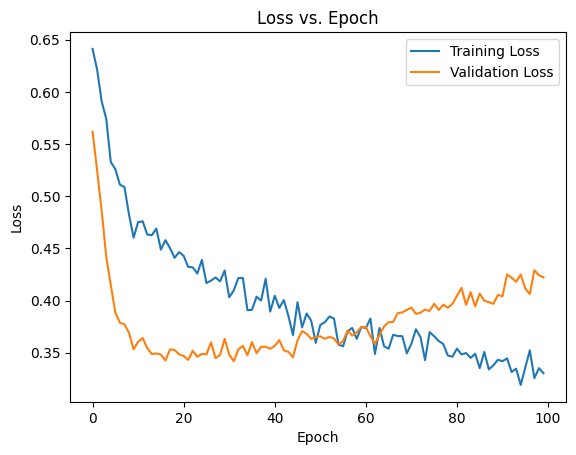

In [ ]:
# Plot loss as a function of epoch

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

# Loss increases over time --> Implement early stopping

# With Early stopping

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_complex_model():
    model = Sequential()

    # First hidden layer with 128 neurons and dropout
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))

    # Second hidden layer with 64 neurons and dropout
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    # Third hidden layer with 32 neurons and dropout
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with specified learning rate
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Build the model
model = build_complex_model()

# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    #validation_data=(X_val, y_val),  # Make sure to have validation data
    validation_split=0.2,
    epochs=100,  # Set a high epoch count; training will stop early if no improvement
    batch_size=32,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5820 - loss: 0.6679 - val_accuracy: 0.7039 - val_loss: 0.5573
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6762 - loss: 0.6049 - val_accuracy: 0.7821 - val_loss: 0.5022
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.5933 - val_accuracy: 0.7989 - val_loss: 0.4528
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.5750 - val_accuracy: 0.8156 - val_loss: 0.4278
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.5363 - val_accuracy: 0.8380 - val_loss: 0.4019
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7784 - loss: 0.5131 - val_accuracy: 0.8380 - val_loss: 0.3830
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7717 - loss: 0.5010 - val_accuracy: 0.8492 - val_loss: 0.3866
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.4924 - val_accuracy: 0.8547 - 

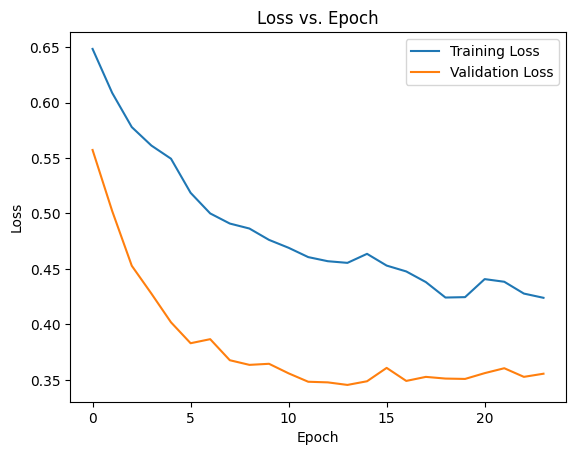

In [ ]:
# Plot loss as a function of epoch

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_F,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S,TicketPrefix_SC,TicketPrefix_SOTON,TicketPrefix_STON,TicketPrefix_W,TicketPrefix_number
0,3,1,-0.592481,1,0,-0.502445,False,True,False,False,False,False,False,False,False,False,False,False,False
1,1,0,0.638789,1,0,0.786845,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,0,-0.284663,0,0,-0.488854,False,True,False,False,False,False,False,False,False,False,True,False,False
3,1,0,0.407926,1,0,0.420730,False,True,False,False,False,False,False,False,False,False,False,False,True
4,3,1,0.407926,0,0,-0.486337,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,-0.207709,0,0,-0.386671,False,True,False,False,False,False,False,False,False,False,False,False,True
887,1,0,-0.823344,0,0,-0.044381,False,True,False,False,False,False,False,False,False,False,False,False,True
888,3,0,0.000000,1,2,-0.176263,False,True,False,False,False,False,False,False,False,False,False,True,False
889,1,1,-0.284663,0,0,-0.044381,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,TicketPrefix_C,TicketPrefix_CA,TicketPrefix_F,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S,TicketPrefix_SC,TicketPrefix_SOTON,TicketPrefix_STON,TicketPrefix_W,TicketPrefix_number
0,3,1,0.334993,0,0,-0.497811,True,False,False,False,False,False,False,False,False,False,False,False,True
1,3,0,1.325530,1,0,-0.512660,False,True,False,False,False,False,False,False,False,False,False,False,True
2,2,1,2.514175,0,0,-0.464532,True,False,False,False,False,False,False,False,False,False,False,False,True
3,3,1,-0.259330,0,0,-0.482888,False,True,False,False,False,False,False,False,False,False,False,False,True
4,3,0,-0.655545,1,1,-0.417971,False,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,0.000000,0,0,-0.493856,False,True,False,False,False,False,False,False,False,False,False,False,False
414,1,0,0.691586,0,0,1.312180,False,False,False,False,False,True,False,False,False,False,False,False,False
415,3,1,0.651965,0,0,-0.508183,False,True,False,False,False,False,False,False,False,True,False,False,False
416,3,1,0.000000,0,0,-0.493856,False,True,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Make predictions on X_test
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [ ]:
# Flatten the predictions array and create a DataFrame
predictions_df = pd.DataFrame(predictions.flatten(), columns=['Survived'])

# Display the DataFrame
predictions_df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
test_id = pd.read_csv('test.csv') # 418 rows × 11 columns

In [ ]:
# # Step 2: Create a DataFrame for predictions
# import pandas as pd

# predictions_df = pd.DataFrame(y_pred, columns=['Survived'])  # No need to flatten since it's likely already 1D

# Step 3: Combine with Passenger IDs from test set
df_submit = pd.concat([test_id[['PassengerId']], predictions_df], axis=1)
df_submit

# Step 4: Save to CSV
df_submit.to_csv('Titanic_23.csv', index=False)

# Display the submission DataFrame
df_submit.head()

# Submission score: 0.76076

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
